# Customer Churn Prediction Model for Revenue Optimization using Machine Learning

# 1. DATA COLLECTION

## 1.1 Import necessary libraries

In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import joblib

## 1.2 Load the dataset
There are 7,043 observations (rows) with 21 attributes (columns) in the dataset

In [151]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

# 2. DATA DESCRIPTION

The raw data contains 7043 rows (customers) and 21 columns (features).

- customer ID: Customer ID
- gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn: Whether the customer churned or not (Yes or No)

# 3. DATA UNDERSTANDING

## 3.1 Features & Corresponding Data Types

In [152]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 3.2 Range of Values of each Feature

In [153]:
def print_df_unique_vals(df):
    for col in df.columns:
        unique_vals = df[col].unique()
        if len(unique_vals) < 10:
            print("{}: {}".format(col, unique_vals))
        else:
            if is_string_dtype(df[col]):
                print("{}: string type".format(col))
            elif is_numeric_dtype(df[col]):
                print("{}: numerical".format(col))
print_df_unique_vals(df)

customerID: string type
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: numerical
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: numerical
TotalCharges: string type
Churn: ['No' 'Yes']


# 4. DATA RESHAPING & CLEANING

## 4.1. Making Labels Concise
- Certain Feature labels such as 'Bank transfer (automatic)' etc. can be shortened for easy visualization
- Also, Updating all labels to lower case for visual consitency

In [154]:
val_map =  {'Male': 'M', 'Female': 'F', 'No': 'N', 'Yes': 'Y', 
            'Fiber optic': 'Fiber', 'No phone service': 'No phone',
            'Month-to-month': 'Monthly', 'No internet service': 'No internet',
            'Credit card (automatic)': 'Credit card',
            'Bank transfer (automatic)': 'Bank transfer',
            'Two year': '2 yr', 'One year': '1 yr'}
df.replace(to_replace=val_map, inplace=True)

# update labels to lower case
df.columns = [label.lower() for label in df.columns]

In [155]:
df.head(2)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,F,0,Y,N,1,N,No phone,DSL,N,...,N,N,N,N,Monthly,Y,Electronic check,29.85,29.85,N
1,5575-GNVDE,M,0,N,N,34,Y,N,DSL,Y,...,Y,N,N,N,1 yr,N,Mailed check,56.95,1889.5,N


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


### From above, we notice: 

- Most features are categorical type.
- The target we will use to guide the exploration is 'Churn'.
- Pandas didn't properly cast the data type of several columns. For instance, the TotalCharges column is recognized as object instead of float. Similarly, all categorical columns are casted as object type rather than Categorical. 'TotalCharges' should be numerical & not a string type.

## 4.2. Casting Monthly Charges & TotalCharges column to float

In [157]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

df['totalcharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: totalcharges, dtype: float64

## 4.3. Dealing with Missing values

- Here we discover that feature 'totalcharges' has 11 missing values. Displaying the complete data corresponding to these customers.
- Further can notice that the Tenure column is 0 for all these entries although the monthlycharges column is not empty.

In [158]:
df[np.isnan(df['totalcharges'])]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,F,0,Y,Y,0,N,No phone,DSL,Y,...,Y,Y,Y,N,2 yr,Y,Bank transfer,52.55,NaN,N
753,3115-CZMZD,M,0,N,Y,0,Y,N,N,No internet,...,No internet,No internet,No internet,No internet,2 yr,N,Mailed check,20.25,NaN,N
936,5709-LVOEQ,F,0,Y,Y,0,Y,N,DSL,Y,...,Y,N,Y,Y,2 yr,N,Mailed check,80.85,NaN,N
1082,4367-NUYAO,M,0,Y,Y,0,Y,Y,N,No internet,...,No internet,No internet,No internet,No internet,2 yr,N,Mailed check,25.75,NaN,N
1340,1371-DWPAZ,F,0,Y,Y,0,N,No phone,DSL,Y,...,Y,Y,Y,N,2 yr,N,Credit card,56.05,NaN,N
3331,7644-OMVMY,M,0,Y,Y,0,Y,N,N,No internet,...,No internet,No internet,No internet,No internet,2 yr,N,Mailed check,19.85,NaN,N
3826,3213-VVOLG,M,0,Y,Y,0,Y,Y,N,No internet,...,No internet,No internet,No internet,No internet,2 yr,N,Mailed check,25.35,NaN,N
4380,2520-SGTTA,F,0,Y,Y,0,Y,N,N,No internet,...,No internet,No internet,No internet,No internet,2 yr,N,Mailed check,20.00,NaN,N
5218,2923-ARZLG,M,0,Y,Y,0,Y,N,N,No internet,...,No internet,No internet,No internet,No internet,1 yr,Y,Mailed check,19.70,NaN,N
6670,4075-WKNIU,F,0,Y,Y,0,Y,Y,DSL,N,...,Y,Y,Y,N,2 yr,N,Mailed check,73.35,NaN,N


Let's see if there are any other 0 values in the tenure column.

In [159]:
df[df['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

So, Tenure column does not have any additional missing values. Since, the percentage of missing values is an insignificant portion of the entire dataset. Let's drop these observations, we can simply delete these rows.

In [160]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

Checking Status of Missing Values:

In [161]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    

display_missing(df)

customerid column missing values: 0
gender column missing values: 0
seniorcitizen column missing values: 0
partner column missing values: 0
dependents column missing values: 0
tenure column missing values: 0
phoneservice column missing values: 0
multiplelines column missing values: 0
internetservice column missing values: 0
onlinesecurity column missing values: 0
onlinebackup column missing values: 0
deviceprotection column missing values: 0
techsupport column missing values: 0
streamingtv column missing values: 0
streamingmovies column missing values: 0
contract column missing values: 0
paperlessbilling column missing values: 0
paymentmethod column missing values: 0
monthlycharges column missing values: 0
totalcharges column missing values: 0
churn column missing values: 0




### Inference: 

Now, No missing values in the dataset

## 4.4.  Casting Categorical features to pd.Categorical
- Need to manually identify categorical columns in the data before casting them to pd.Categorical. 
- Casting categorical columns from the detected object type will ease computation and visualization.

In [162]:
def to_categoricals(df):
 
    # find categorical columns in the dataframe.
    cat_cols = []
    cutoff = 10
    for col in df.columns:
        if len(df[col].unique()) <= cutoff:
            cat_cols.append(col)
            
    #Converts the columns passed in `columns` to categorical datatype
    for col in cat_cols:
        df[col] = df[col].astype('category')
    return df
to_categoricals(df).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerid        7032 non-null   object  
 1   gender            7032 non-null   category
 2   seniorcitizen     7032 non-null   category
 3   partner           7032 non-null   category
 4   dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   phoneservice      7032 non-null   category
 7   multiplelines     7032 non-null   category
 8   internetservice   7032 non-null   category
 9   onlinesecurity    7032 non-null   category
 10  onlinebackup      7032 non-null   category
 11  deviceprotection  7032 non-null   category
 12  techsupport       7032 non-null   category
 13  streamingtv       7032 non-null   category
 14  streamingmovies   7032 non-null   category
 15  contract          7032 non-null   category
 16  paperlessbilling  7032 n

## 4.5. Dealing with Duplicate Values

In [163]:
# summarize duplicates
sum(df.duplicated('customerid'))

0

### Inference: 

There are no duplicate rows.

## 4.6 Drop 'customerid' Feature

- Since 'customerid' feature does not contribute to predicting customer churn, we can remove this feature.

In [164]:
df.drop(labels=['customerid'], axis=1, inplace=True)
df.head(2)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,F,0,Y,N,1,N,No phone,DSL,N,Y,N,N,N,N,Monthly,Y,Electronic check,29.85,29.85,N
1,M,0,N,N,34,Y,N,DSL,Y,N,Y,N,N,N,1 yr,N,Mailed check,56.95,1889.50,N


## 4.7. Dealing with Outliers

- Outliers need to be checked for too as they may skew a model's prediction

In [165]:
# Summary statistics of numerical features:
cont_features = ['tenure', 'monthlycharges', 'totalcharges']
df_num = df[cont_features]
df_num.describe()

,tenure,monthlycharges,totalcharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


One way we can check for outliers is to use the interquartile range. The IQR is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles. From the results below, it seems that there are no outliers.

In [166]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

tenure            False
monthlycharges    False
totalcharges      False
dtype: bool

### Inference: 

No outliers

# 5. EXPLORATORY DATA AANALYSIS (EDA)

# 5.1. Exploring Numerical Attributes

## 5.1.1. Correlation between Quantitative variables

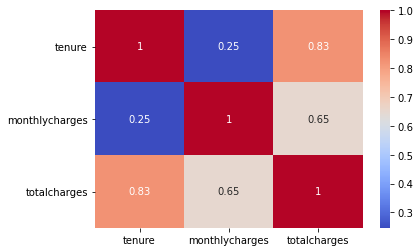

In [167]:
sns.heatmap(data=df[['tenure', 'monthlycharges', 'totalcharges']].corr(),
            annot=True, cmap='coolwarm');

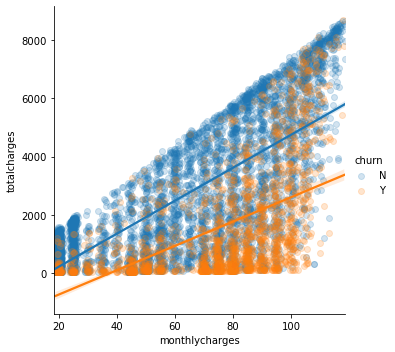

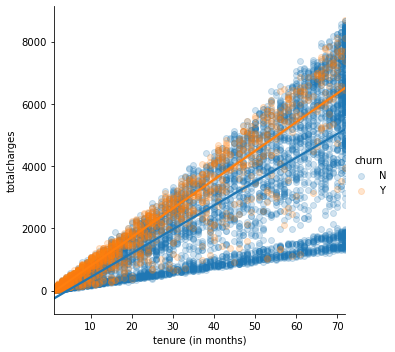

In [168]:
sns.lmplot('monthlycharges', 'totalcharges', data=df, hue='churn',
           scatter_kws={'alpha': 0.2})
fig = sns.lmplot('tenure', 'totalcharges', data=df, hue='churn',
                 scatter_kws={'alpha': 0.2})
fig.set_xlabels('tenure (in months)');

### Inference: 

Also evident from the correlation matrix, since 'totalcharges' is the total monthly charge over the tenure of a customer, 'totalcharges' is highly correlated with 'monthlycharges' and 'tenure'.

## 5.1.2. Frequency Distribution

- The visualizations below show the distribution plot of the numerical attributes, split by Churn and non-Churn

In [169]:
churn = df.groupby(by='churn')

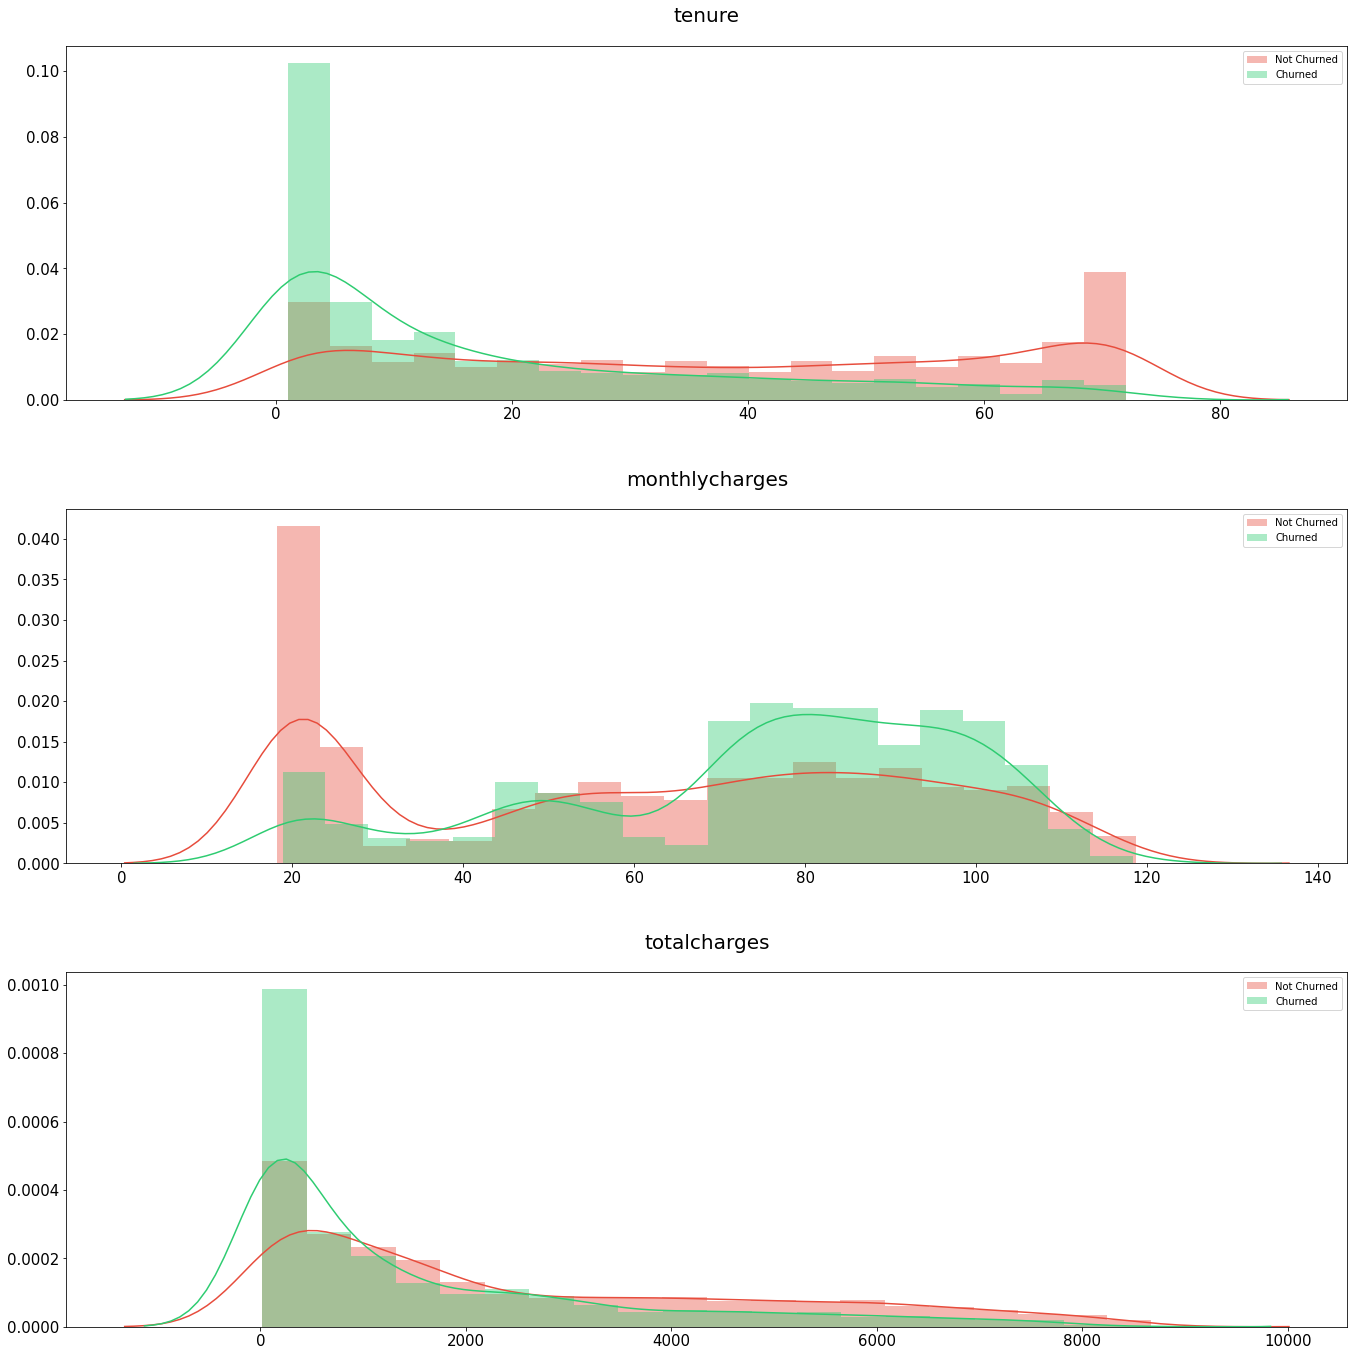

In [170]:
def plot_dist_num_cols_target(df, cont_features, target, target_label, title_label):
    fig, axs = plt.subplots(ncols=1, nrows=len(cont_features), figsize=(20, 20))
    plt.subplots_adjust(right=1.5)
    for i, feature in enumerate(cont_features):    
        sns.distplot(churn.get_group('N')[feature], label='Not {}'.format(target_label), bins=20, hist=True, color='#e74c3c', ax=axs[i])
        sns.distplot(churn.get_group('Y')[feature], label='{}'.format(target_label), bins=20, hist=True, color='#2ecc71', ax=axs[i])

        axs[i].set_xlabel('')
        axs[i].set_xlabel('')

        for j in range(len(cont_features)):        
            axs[j].tick_params(axis='x', labelsize=15)
            axs[j].tick_params(axis='y', labelsize=15)

        axs[i].legend(loc='upper right', prop={'size': 10})
        axs[i].legend(loc='upper right', prop={'size': 10})
        axs[i].set_title('{}'.format(feature), size=20, y=1.05)

    plt.tight_layout(pad=5)
    # plt.savefig('numerical_attributes.png')

    plt.show()

plot_dist_num_cols_target(df, cont_features, churn, 'Churned', 'Customers (Churned & Non-Churned)')

### Inference: 

We can say that most churn customers have:
- a tenure of around 0 to 20 months.
- monthly charges of around 70 to 110 and 

## 5.2. Exploring Categorical Attributes

In [171]:
cat_features = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 
                'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 
                'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
                'contract', 'paperlessbilling', 'paymentmethod']

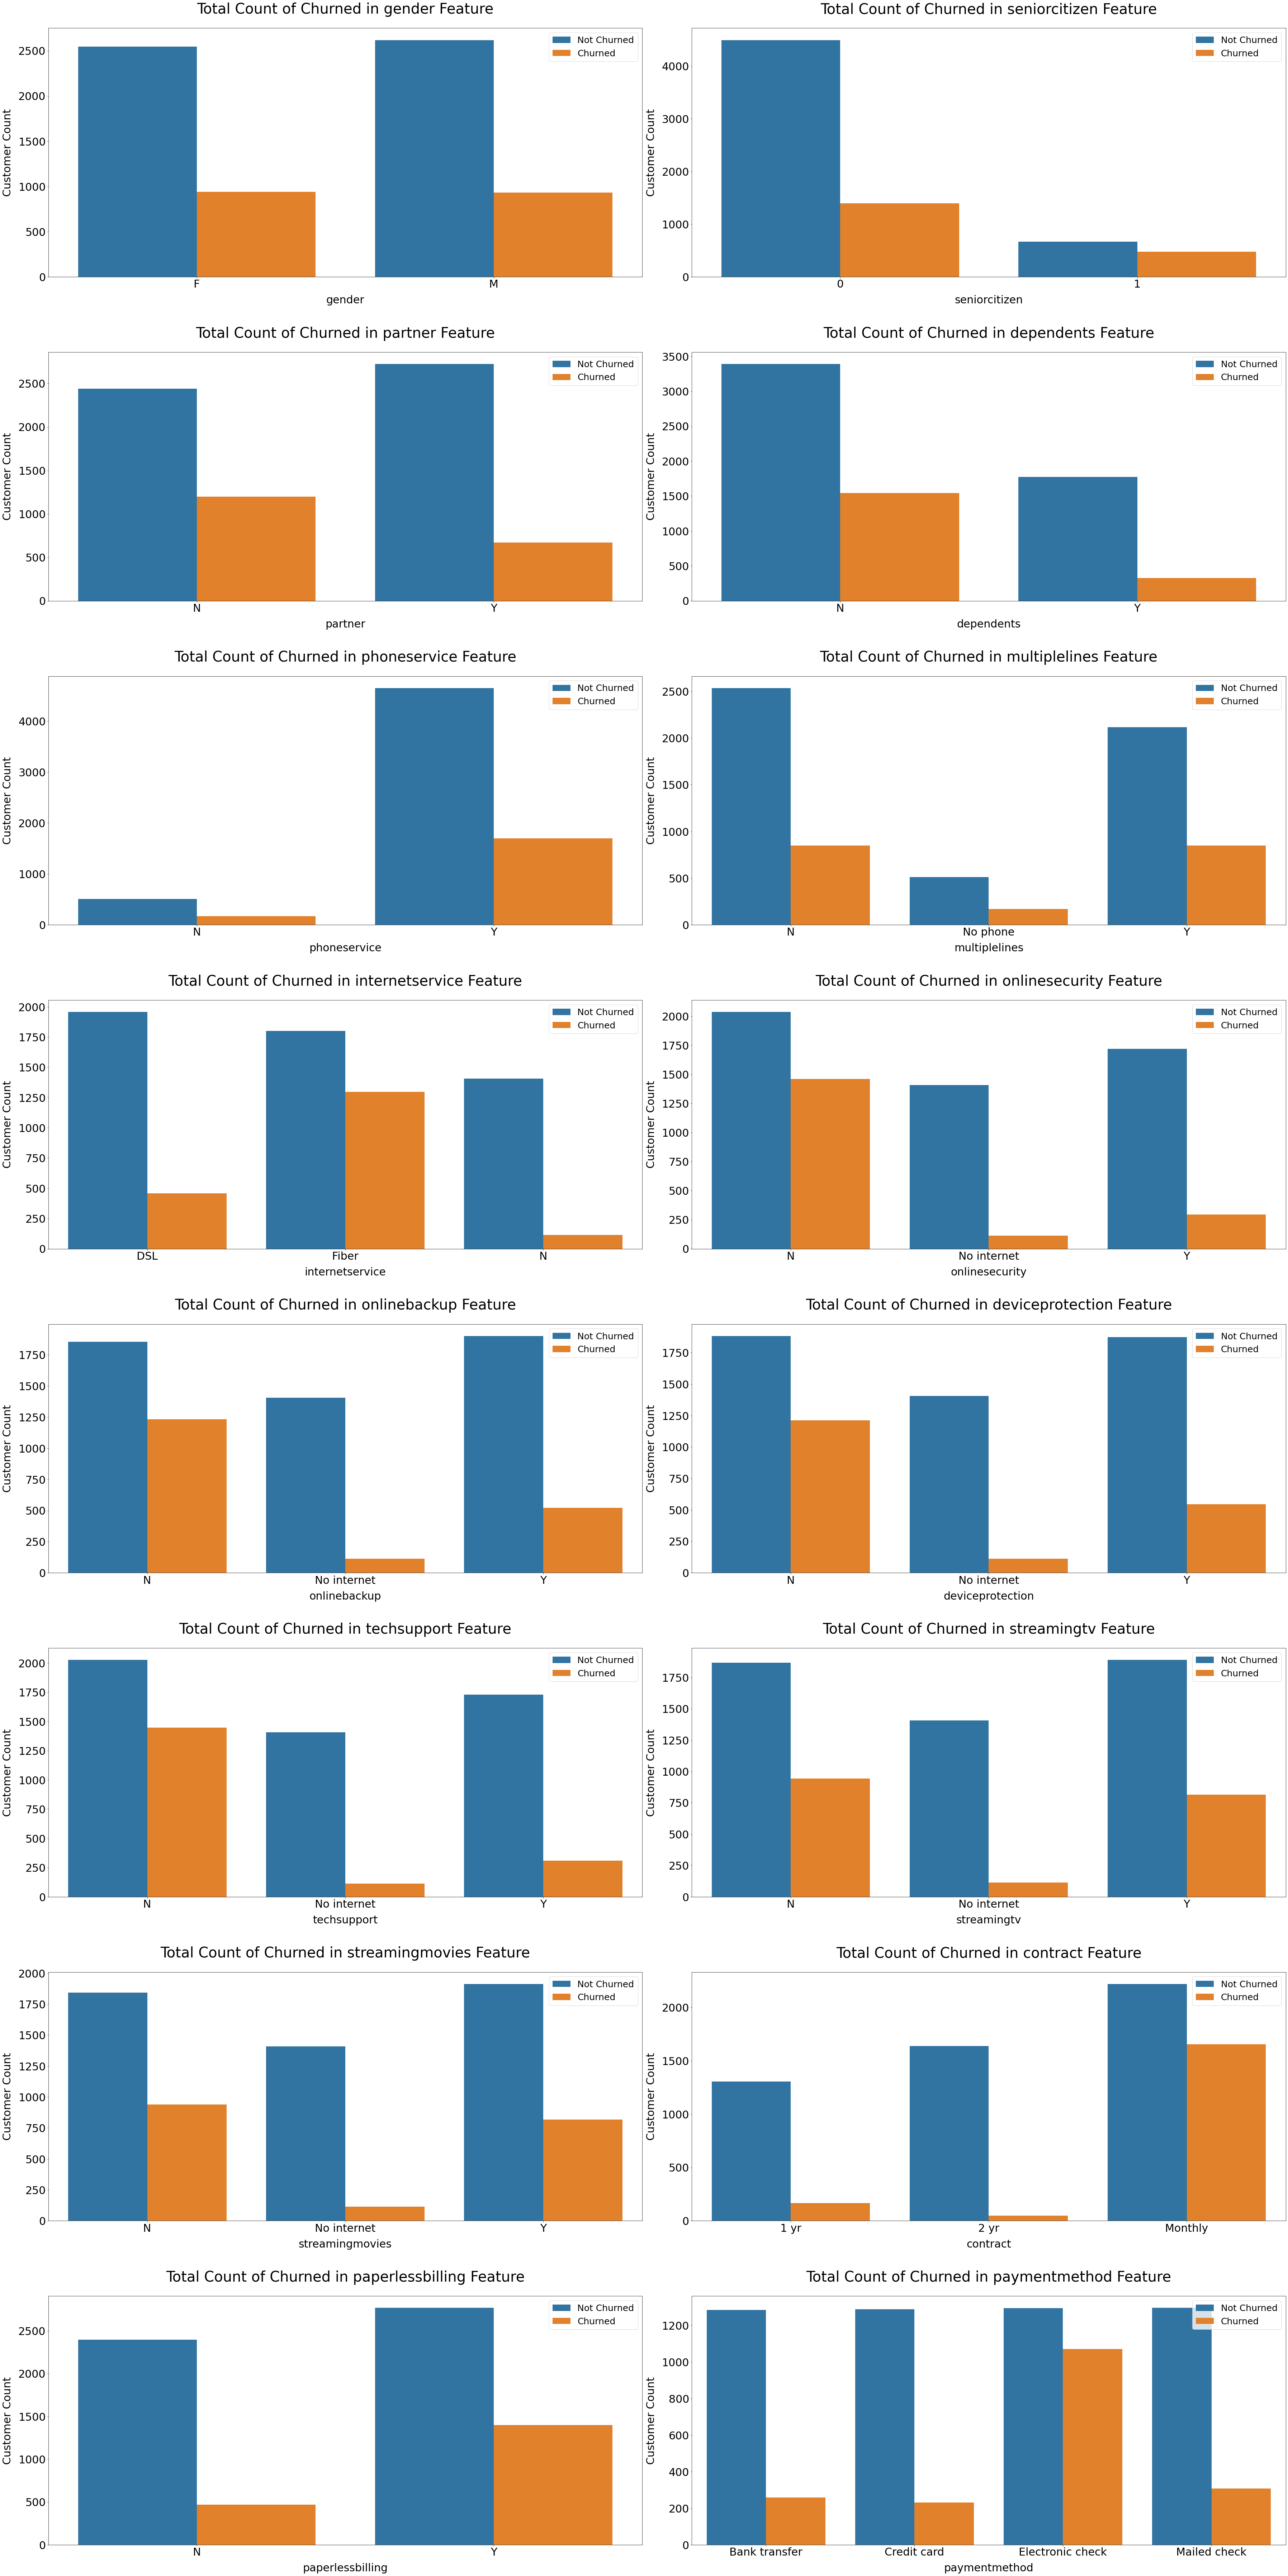

In [172]:
def plot_bar_cat_cols(df, cat_features, target_label, hue):
    fig, axs = plt.subplots(ncols=2, nrows=8, figsize=(50, 100))
    plt.subplots_adjust(right=1.5, top=1.25)
    for i, feature in enumerate(cat_features, 1):    
        plt.subplot(8, 2, i)
        sns.countplot(x=feature, hue=hue, data=df)
        plt.xlabel('{}'.format(feature), size=30, labelpad=15)
        plt.ylabel('Customer Count', size=30, labelpad=15)    
        plt.tick_params(axis='x', labelsize=30)
        plt.tick_params(axis='y', labelsize=30)

        plt.legend(['Not {}'.format(target_label), '{}'.format(target_label)], loc='upper right', prop={'size': 25})
        plt.title('Total Count of {} in {} Feature'.format(target_label, feature), size=40, y=1.05)

    plt.tight_layout(h_pad=5)
    plt.savefig('cat_attributes_bar.png')
    plt.show()

plot_bar_cat_cols(df, cat_features, 'Churned', 'churn')

### Inference: 

- For all categorical variables, it looks like customers that are not churned outnumber customers that are churned.

- For gender, males and females have almost equal number of churned and non-churned customers

- On first glance, a simple classification model likely is not good enough as categorical variables are not highly separable to churned and non-churned customers.

## 5.3. Check for Target Class Imbalance

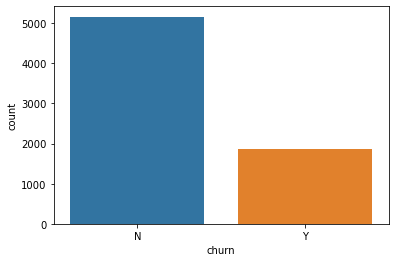

In [173]:
sns.countplot(x="churn", data=df)

### Inference: 

The dataset is imbalanced as can be seen from the Churn plot.

## 5.4. Impact Assessment of Categorical Features on Monthly Revenue 

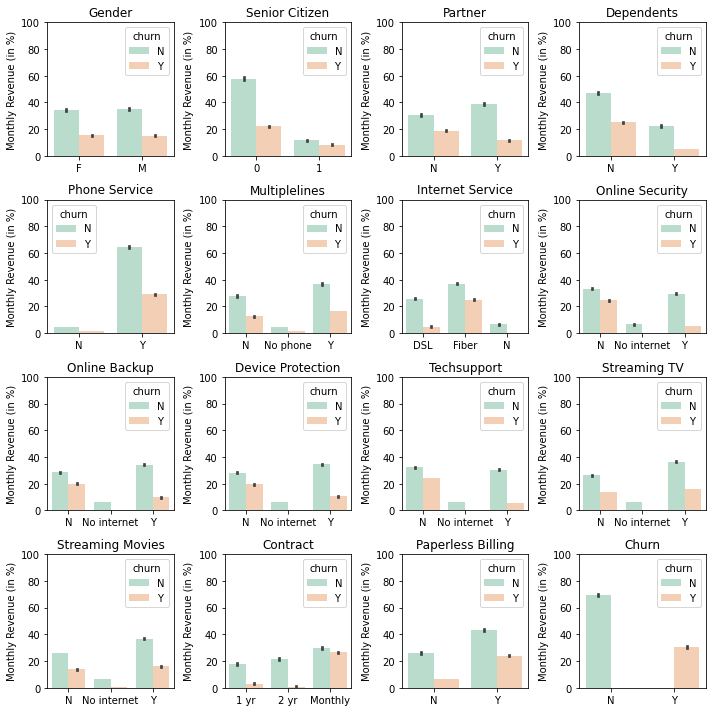

In [174]:
# Temporarily adding new 'share' column to the dataframe
df['share'] = (df['monthlycharges'] * 100) / df['monthlycharges'].sum()
titles = ['Gender', 'Senior Citizen', 'Partner', 'Dependents',
          'Phone Service', 'Multiplelines', 'Internet Service', 'Online Security',
          'Online Backup', 'Device Protection', 'Techsupport', 'Streaming TV',
          'Streaming Movies', 'Contract', 'Paperless Billing', 'Churn']

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

ax_title_pairs = zip(axs.flat, titles)

for ax, title in ax_title_pairs:
    sns.barplot(x=''.join(title.lower().split()), y='share', hue='churn', data=df,
                estimator=np.sum, palette='Pastel2', ax=ax)
    ax.set_title(title)
    ax.set_ylim(0, 100)
    ax.set_xlabel('')
    ax.set_ylabel('Monthly Revenue (in %)')

fig.tight_layout()


### Inference: 

Majority of the churned customers are not senior citizens, do not have dependents, are subscribed to phone service, Fiber internet, and paperless billing, are not subscribed to online security and tech support, and have monthly contracts.

In [175]:
# Remove the share column
df.drop(labels=['share'], axis=1, inplace=True)

# 6. DATA PREPROCESSING

## 6.1. Train-Test split

In [176]:
x = df.iloc[:, :-1]
y = df['churn']

categorical_columns = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 
                        'multiplelines', 'internetservice', 'onlinesecurity',
                       'onlinebackup', 'deviceprotection', 'techsupport', 
                        'streamingtv', 'streamingmovies', 'contract', 
                       'paperlessbilling', 'paymentmethod']
numeric_columns = ['tenure', 'monthlycharges', 'totalcharges']

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   seniorcitizen     7032 non-null   category
 2   partner           7032 non-null   category
 3   dependents        7032 non-null   category
 4   tenure            7032 non-null   int64   
 5   phoneservice      7032 non-null   category
 6   multiplelines     7032 non-null   category
 7   internetservice   7032 non-null   category
 8   onlinesecurity    7032 non-null   category
 9   onlinebackup      7032 non-null   category
 10  deviceprotection  7032 non-null   category
 11  techsupport       7032 non-null   category
 12  streamingtv       7032 non-null   category
 13  streamingmovies   7032 non-null   category
 14  contract          7032 non-null   category
 15  paperlessbilling  7032 non-null   category
 16  paymentmethod     7032 n

In [177]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0,
                                                    shuffle=True, stratify=y)

# Saving non-scaled version of monthlycharges and totalcharges to compare classifiers
x_test_charges = np.array(x_test[['monthlycharges', 'totalcharges']], copy=True)

## 6.2 Encoding & Standardisation

- We need to standardize the continuous or numeric features before applying Machine Learning models. This is critical because otherwise features with high variance that are of larger magnitude than others might dominate the model fitting process and render the model unable to learn from other features (with lower variance).

- Standardization is not required for categorical variables. However, one-hot encoding is desired.

- Also it is important to standardize the data only after performing train-test split because if done before then there is a chance of information leak from the train set into the test set. We always want the test set to be completely new to the ML models.

In [178]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder


## Column Transformer: Standard scaling numeric columns & one-hot encoding categorical columns
transformers = [('one_hot_encoder',
                  OneHotEncoder(drop='first',dtype='int'),
                  categorical_columns),
                ('standard_scaler', StandardScaler(), numeric_columns)]
x_trans = ColumnTransformer(transformers, remainder='passthrough')

## Applying Column Transformer
x_train = x_trans.fit_transform(x_train)
x_test = x_trans.transform(x_test)

## Label encoding target class
y_trans = LabelEncoder()
y_train = y_trans.fit_transform(y_train)
y_test = y_trans.transform(y_test)


## Save feature names after one-hot encoding for feature importances plots
encoded_feature_names = list(x_trans.named_transformers_['one_hot_encoder'] \
                            .get_feature_names(input_features=categorical_columns))
encoded_feature_names = encoded_feature_names + numeric_columns

In [118]:
encoded_feature_names

['gender_M',
 'seniorcitizen_1',
 'partner_Y',
 'dependents_Y',
 'phoneservice_Y',
 'multiplelines_No phone',
 'multiplelines_Y',
 'internetservice_Fiber',
 'internetservice_N',
 'onlinesecurity_No internet',
 'onlinesecurity_Y',
 'onlinebackup_No internet',
 'onlinebackup_Y',
 'deviceprotection_No internet',
 'deviceprotection_Y',
 'techsupport_No internet',
 'techsupport_Y',
 'streamingtv_No internet',
 'streamingtv_Y',
 'streamingmovies_No internet',
 'streamingmovies_Y',
 'contract_2 yr',
 'contract_Monthly',
 'paperlessbilling_Y',
 'paymentmethod_Credit card',
 'paymentmethod_Electronic check',
 'paymentmethod_Mailed check',
 'tenure',
 'monthlycharges',
 'totalcharges']

# 7. DATA MODELING

Since our dataset has severe class imbalance, it makes more sense to use class-weighted learning. In class-weighted learning, a weighted cost function is used. This means that misclassifying a sample from the minority class will cost the classifiers more than misclassifying a sample from the majority class. In most of the Sklearn classifiers, class-weighted learning can be enabled by setting class_weight='balanced'.

## 7.1. Utility Functions 

- Source: adapted from Kaggle

In [179]:
import timeit
import pickle
import sys
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, \
                            precision_recall_curve, roc_curve, accuracy_score
from sklearn.exceptions import NotFittedError

In [180]:
def confusion_matrix_plot(matrix, labels=None):
    """ Displays confusion matrix as a Seaborn heatmap """
    
    labels = labels if labels else ['Negative (0)', 'Positive (1)']
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    sns.heatmap(data=matrix, cmap='Blues', annot=True, fmt='d',
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('PREDICTED')
    ax.set_ylabel('ACTUAL')
    ax.set_title('Confusion Matrix')
    plt.close()
    
    return fig

In [181]:
def roc_plot(y_true, y_probs, label, compare=False, ax=None):
    """ Plot Receiver Operating Characteristic (ROC) curve 
        Set `compare=True` to use this function to compare classifiers. """
    
    fpr, tpr, thresh = roc_curve(y_true, y_probs, drop_intermediate=False)
    auc = round(roc_auc_score(y_true, y_probs), 2)
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    label = ' '.join([label, f'({auc})']) if compare else None
    sns.lineplot(x=fpr, y=tpr, ax=axis, label=label)
    
    if compare:
        axis.legend(title='Classifier (AUC)', loc='lower right')
    else:
        axis.text(0.72, 0.05, f'AUC = { auc }', fontsize=12,
                  bbox=dict(facecolor='green', alpha=0.4, pad=5))
            
        # Plot No-Info classifier
        axis.fill_between(fpr, fpr, tpr, alpha=0.3, edgecolor='g',
                          linestyle='--', linewidth=2)
        
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('ROC Curve')
    axis.set_xlabel('False Positive Rate [FPR]\n(1 - Specificity)')
    axis.set_ylabel('True Positive Rate [TPR]\n(Sensitivity or Recall)')
    
    plt.close()
    
    return axis if ax else fig

In [182]:
def precision_recall_plot(y_true, y_probs, label, compare=False, ax=None):
    """ Plot Precision-Recall curve.
        Set `compare=True` to use this function to compare classifiers. """
    
    p, r, thresh = precision_recall_curve(y_true, y_probs)
    p, r, thresh = list(p), list(r), list(thresh)
    p.pop()
    r.pop()
    
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1)
    
    if compare:
        sns.lineplot(r, p, ax=axis, label=label)
        axis.set_xlabel('Recall')
        axis.set_ylabel('Precision')
        axis.legend(loc='lower left')
    else:
        sns.lineplot(thresh, p, label='Precision', ax=axis)
        axis.set_xlabel('Threshold')
        axis.set_ylabel('Precision')
        axis.legend(loc='lower left')

        axis_twin = axis.twinx()
        sns.lineplot(thresh, r, color='limegreen', label='Recall', ax=axis_twin)
        axis_twin.set_ylabel('Recall')
        axis_twin.set_ylim(0, 1)
        axis_twin.legend(bbox_to_anchor=(0.24, 0.18))
    
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('Precision Vs Recall')
    
    plt.close()
    
    return axis if ax else fig

In [183]:
def feature_importance_plot(importances, feature_labels, ax=None):
    fig, axis = (None, ax) if ax else plt.subplots(nrows=1, ncols=1, figsize=(5, 10))
    sns.barplot(x=importances, y=feature_labels, ax=axis)
    axis.set_title('Feature Importance Measures')
    
    plt.close()
    
    return axis if ax else fig

In [184]:
def train_clf(clf, x_train, y_train, sample_weight=None, refit=False):
    train_time = 0
    
    try:
        if refit:
            raise NotFittedError
        y_pred_train = clf.predict(x_train)
    except NotFittedError:
        start = timeit.default_timer()
        
        if sample_weight is not None:
            clf.fit(x_train, y_train, sample_weight=sample_weight)
        else:
            clf.fit(x_train, y_train)
        
        end = timeit.default_timer()
        train_time = end - start
        
        y_pred_train = clf.predict(x_train)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    return clf, y_pred_train, train_acc, train_time

In [185]:
def model_memory_size(clf):
    return sys.getsizeof(pickle.dumps(clf))

In [186]:
def report(clf, x_train, y_train, x_test, y_test, sample_weight=None,
           refit=False, importance_plot=False, confusion_labels=None,
           feature_labels=None, verbose=True):
    """ Trains the passed classifier if not already trained and reports
        various metrics of the trained classifier """
    
    dump = dict()
    
    ## Train if not already trained
    clf, train_predictions, \
    train_acc, train_time = train_clf(clf, x_train, y_train,
                                                     sample_weight=sample_weight,
                                                     refit=refit)
    ## Testing
    start = timeit.default_timer()
    test_predictions = clf.predict(x_test)
    end = timeit.default_timer()
    test_time = end - start
    
    test_acc = accuracy_score(y_test, test_predictions)
    y_probs = clf.predict_proba(x_test)[:, 1]
    
    roc_auc = roc_auc_score(y_test, y_probs)
    
    
    ## Model Memory
    model_mem = round(model_memory_size(clf) / 1024, 2)
    
    print(clf)
    print("\n=============================> TRAIN-TEST DETAILS <======================================")
    
    ## Metrics
    print(f"Train Size: {x_train.shape[0]} samples")
    print(f" Test Size: {x_test.shape[0]} samples")
    print("------------------------------------------")
    print(f"Training Time: {round(train_time, 3)} seconds")
    print(f" Testing Time: {round(test_time, 3)} seconds")
    print("------------------------------------------")
    print("Train Accuracy: ", train_acc)
    print(" Test Accuracy: ", test_acc)
    print("------------------------------------------")
    print(" Area Under ROC: ", roc_auc)
    print("------------------------------------------")
    print(f"Model Memory Size: {model_mem} kB")
    print("\n=============================> CLASSIFICATION REPORT <===================================")
    
    ## Classification Report
    clf_rep = classification_report(y_test, test_predictions, output_dict=True)
    
    print(classification_report(y_test, test_predictions,
                                target_names=confusion_labels))
    
    
    if verbose:
        print("\n================================> CONFUSION MATRIX <=====================================")
    
        ## Confusion Matrix HeatMap
        display(confusion_matrix_plot(confusion_matrix(y_test, test_predictions),
                               labels=confusion_labels))
        print("\n=======================================> PLOTS <=========================================")


        ## Variable importance plot
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
        roc_axes = axes[0, 0]
        pr_axes = axes[0, 1]
        importances = None

        if importance_plot:
            if not feature_labels:
                raise RuntimeError("'feature_labels' argument not passed "
                                   "when 'importance_plot' is True")

            try:
                importances = pd.Series(clf.feature_importances_,
                                        index=feature_labels) \
                                .sort_values(ascending=False)
            except AttributeError:
                try:
                    importances = pd.Series(clf.coef_.ravel(),
                                            index=feature_labels) \
                                    .sort_values(ascending=False)
                except AttributeError:
                    pass

            if importances is not None:
                # Modifying grid
                grid_spec = axes[0, 0].get_gridspec()
                for ax in axes[:, 0]:
                    ax.remove()   # remove first column axes
                large_axs = fig.add_subplot(grid_spec[0:, 0])

                # Plot importance curve
                feature_importance_plot(importances=importances.values,
                                        feature_labels=importances.index,
                                        ax=large_axs)
                large_axs.axvline(x=0)

                # Axis for ROC and PR curve
                roc_axes = axes[0, 1]
                pr_axes = axes[1, 1]
            else:
                # remove second row axes
                for ax in axes[1, :]:
                    ax.remove()
        else:
            # remove second row axes
            for ax in axes[1, :]:
                ax.remove()


        ## ROC and Precision-Recall curves
        clf_name = clf.__class__.__name__
        roc_plot(y_test, y_probs, clf_name, ax=roc_axes)
        precision_recall_plot(y_test, y_probs, clf_name, ax=pr_axes)

        fig.subplots_adjust(wspace=5)
        fig.tight_layout()
        display(fig)
    
    ## Dump to report_dict
    dump = dict(clf=clf, train_acc=train_acc, train_time=train_time,
                train_predictions=train_predictions, test_acc=test_acc,
                test_time=test_time, test_predictions=test_predictions,
                test_probs=y_probs, report=clf_rep, roc_auc=roc_auc,
                model_memory=model_mem)
    
    return clf, dump

In [187]:
def compare_models(y_test=None, clf_reports=[], labels=[]):
    """ Compare evaluation metrics for the True Positive class [1] of 
        binary classifiers passed in the argument and plot ROC and PR curves.
        
        Arguments:
        ---------
        y_test: to plot ROC and Precision-Recall curves
        
        Returns:
        -------
        compare_table: pandas DataFrame containing evaluated metrics
                  fig: `matplotlib` figure object with ROC and PR curves """

    
    ## Classifier Labels
    default_names = [rep['clf'].__class__.__name__ for rep in clf_reports]
    clf_names =  labels if len(labels) == len(clf_reports) else default_names
    
    
    ## Compare Table
    table = dict()
    index = ['Train Accuracy', 'Test Accuracy', 'Overfitting', 'ROC Area',
             'Precision', 'Recall', 'F1-score', 'Support']
    for i in range(len(clf_reports)):
        train_acc = round(clf_reports[i]['train_acc'], 3)
        test_acc = round(clf_reports[i]['test_acc'], 3)
        clf_probs = clf_reports[i]['test_probs']
        roc_auc = clf_reports[i]['roc_auc']
        
        # Get metrics of True Positive class from sklearn classification_report
        true_positive_metrics = list(clf_reports[i]['report']["1"].values())
        
        table[clf_names[i]] = [train_acc, test_acc,
                               test_acc < train_acc, roc_auc] + true_positive_metrics
    
    table = pd.DataFrame(data=table, index=index)
    
    
    ## Compare Plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    # ROC and Precision-Recall
    for i in range(len(clf_reports)):
        clf_probs = clf_reports[i]['test_probs']
        roc_plot(y_test, clf_probs, label=clf_names[i],
                 compare=True, ax=axes[0])
        precision_recall_plot(y_test, clf_probs, label=clf_names[i],
                              compare=True, ax=axes[1])
    # Plot No-Info classifier
    axes[0].plot([0,1], [0,1], linestyle='--', color='green')
        
    fig.tight_layout()
    plt.close()
    
    return table.T, fig

In [188]:
confusion_lbs = ['No Churn', 'Churn']

 ## 7.2. K-Nearest Neighbors

## 7.2.1. Finding Optimum value of K

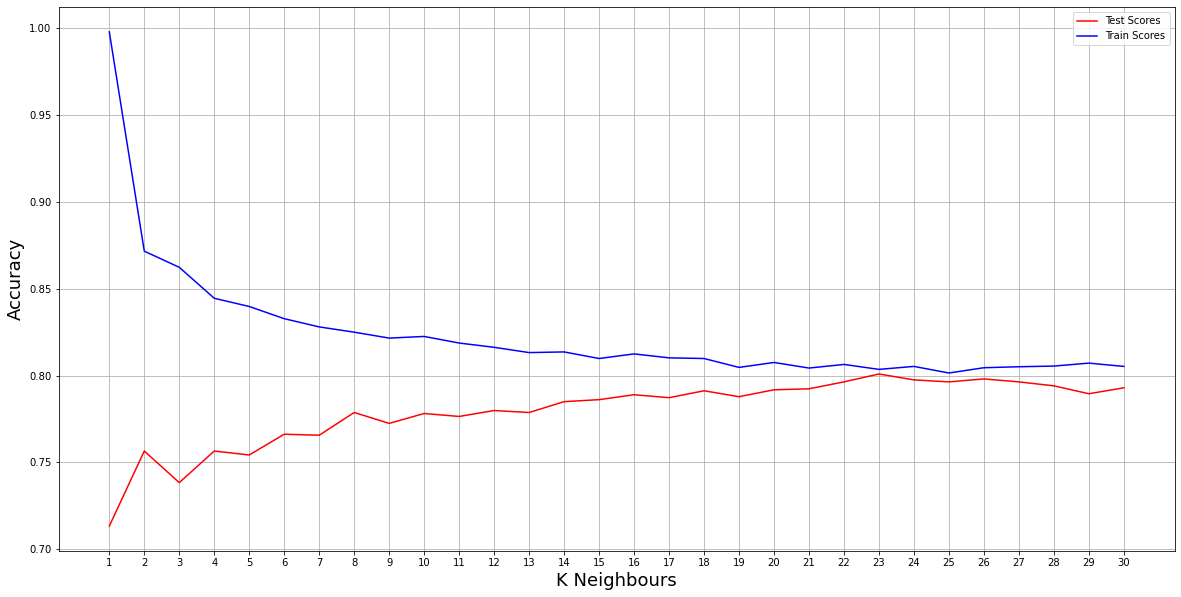

In [189]:
from sklearn import metrics

n_neighbors = [*range(1, 31, 1)] 

testscores = []
trainscores = []

for k in n_neighbors:
    model = KNeighborsClassifier(k)
    model.fit(x_train, y_train)
    
    test_pred = model.predict(x_test)
    train_pred = model.predict(x_train)
    
    testscores.append(metrics.accuracy_score(y_test, test_pred))
    trainscores.append(metrics.accuracy_score(y_train, train_pred))

plt.figure(figsize=(20,10))
plt.plot(n_neighbors, testscores, label = 'Test Scores', color = 'red')
plt.xlabel('K Neighbours', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.xticks(n_neighbors)
plt.grid(True)

plt.plot(n_neighbors, trainscores, label = 'Train Scores', color = 'blue')

plt.legend()

## 7.2.3. Generating Report

KNN estimator in Scikit-learn does not provide a way to pass class-weights to enable cost-sensitive/ class-weighted learning.

KNeighborsClassifier(n_jobs=-1, n_neighbors=23, p=1)

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 5274 samples
 Test Size: 1758 samples
------------------------------------------
Training Time: 0.015 seconds
 Testing Time: 0.347 seconds
------------------------------------------
Train Accuracy:  0.8054607508532423
 Test Accuracy:  0.79806598407281
------------------------------------------
 Area Under ROC:  0.8341557513140718
------------------------------------------
Model Memory Size: 1447.2 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

    No Churn       0.85      0.88      0.86      1291
       Churn       0.63      0.57      0.60       467

    accuracy                           0.80      1758
   macro avg       0.74      0.73      0.73      1758
weighted avg       0.79      0.80      0.79      1758


=====================

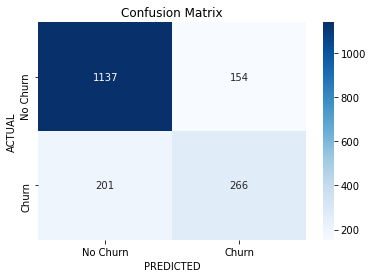


=======================================> PLOTS <=========================================


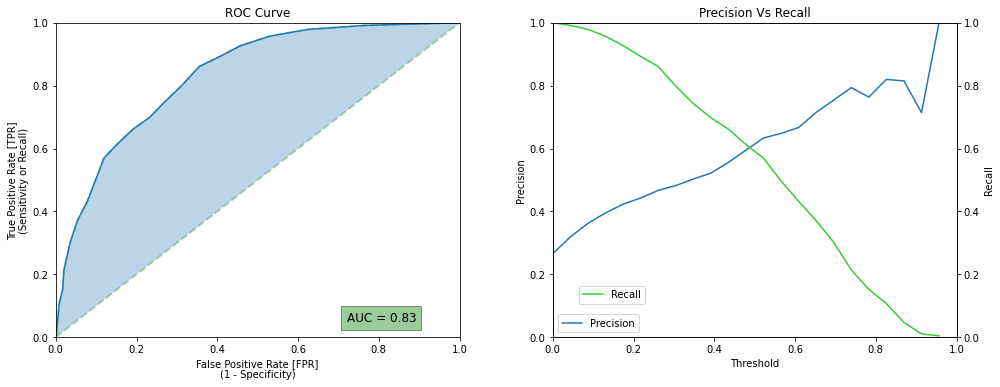

In [190]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=23, p=1,
                           weights='uniform', n_jobs=-1)

knn, knn_report = report(knn, x_train, y_train,
                         x_test, y_test,
                         importance_plot=True,
                         feature_labels=encoded_feature_names,
                         confusion_labels=confusion_lbs)

# 7.3. Logistic Regression CV

LogisticRegressionCV(class_weight='balanced', cv=5, max_iter=500, n_jobs=-1,
                     penalty='l1', random_state=0, scoring='f1',
                     solver='liblinear')

=============================> TRAIN-TEST DETAILS <======================================
Train Size: 5274 samples
 Test Size: 1758 samples
------------------------------------------
Training Time: 12.892 seconds
 Testing Time: 0.001 seconds
------------------------------------------
Train Accuracy:  0.7510428517254456
 Test Accuracy:  0.7514220705346986
------------------------------------------
 Area Under ROC:  0.844624371990572
------------------------------------------
Model Memory Size: 14.16 kB

=============================> CLASSIFICATION REPORT <===================================
              precision    recall  f1-score   support

    No Churn       0.90      0.74      0.81      1291
       Churn       0.52      0.78      0.63       467

    accuracy                           0.75      1758


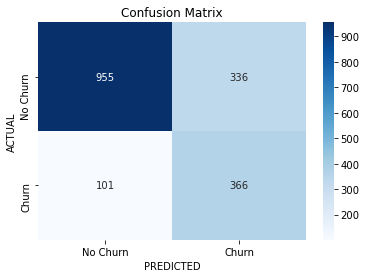


=======================================> PLOTS <=========================================


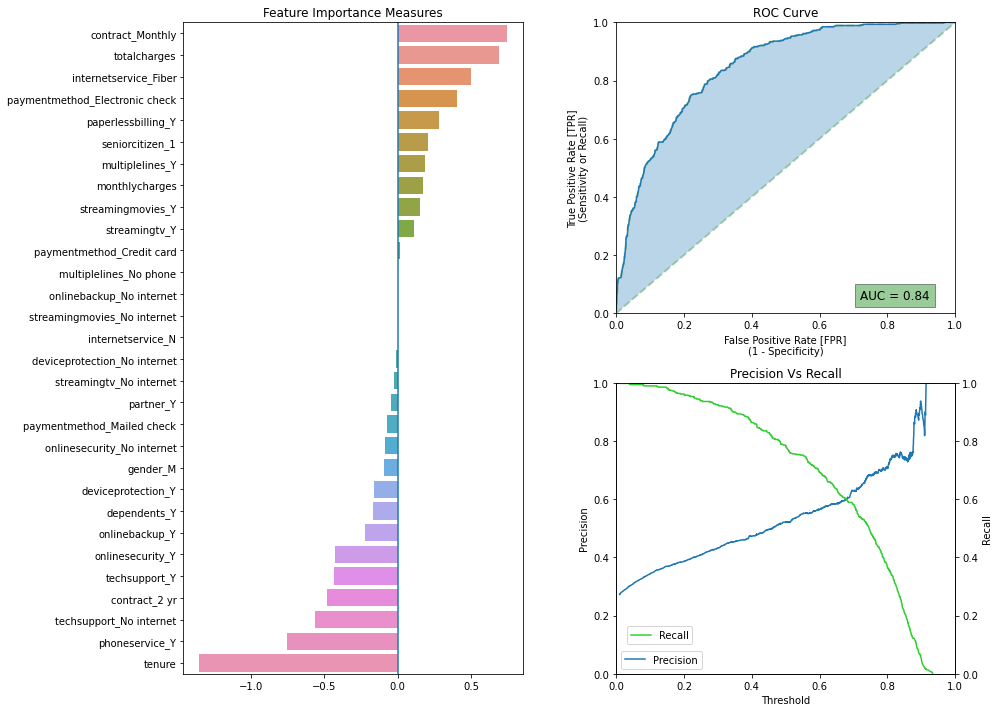

In [191]:
from sklearn.linear_model import LogisticRegressionCV

logit_cv = LogisticRegressionCV(class_weight='balanced', cv=5, max_iter=500,
                                scoring='f1', penalty='l1', solver='liblinear',
                                n_jobs=-1, random_state=0, refit=True, verbose=0)

logit_cv, logit_report = report(logit_cv, x_train, y_train,
                                x_test, y_test, refit=True,
                                importance_plot=True,
                                feature_labels=encoded_feature_names,
                                confusion_labels=confusion_lbs)

## 7.4. XGBOOST

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2.761768901569187,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

=============================> TRAIN-TEST DETAILS <===============================

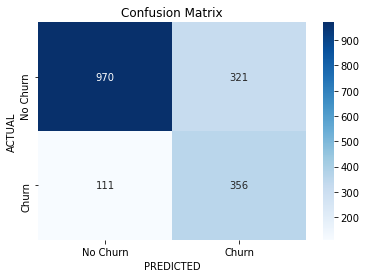


=======================================> PLOTS <=========================================


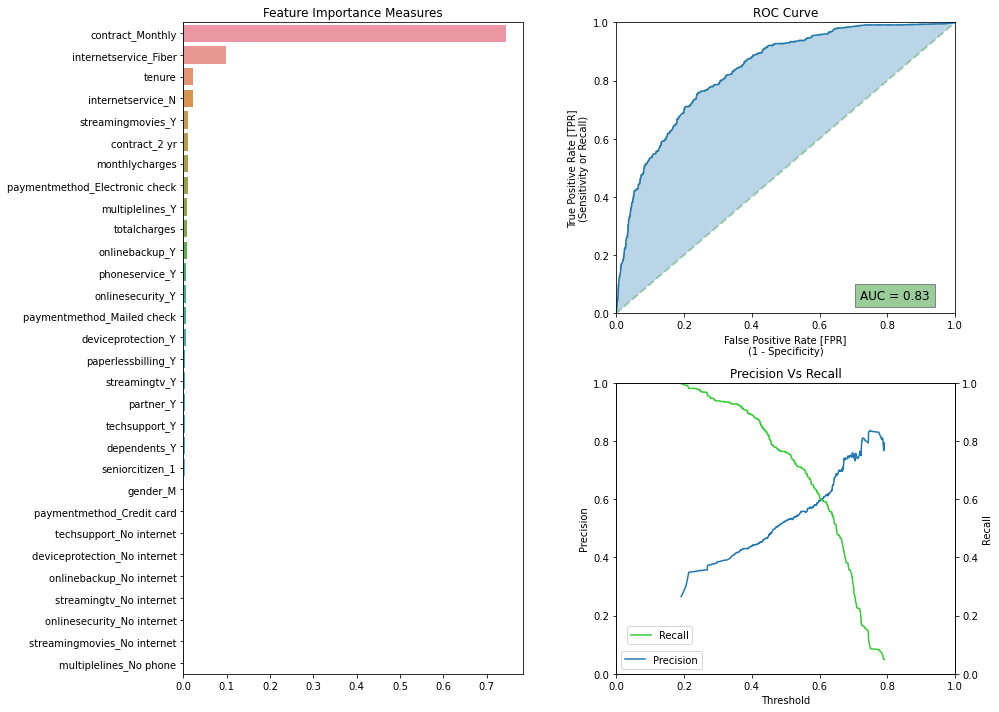

In [192]:
from xgboost import XGBClassifier
from sklearn.utils import class_weight

## Compute `class_weights` using sklearn
cls_weight = (y_train.shape[0] - np.sum(y_train)) / np.sum(y_train)

xgb_clf = XGBClassifier(learning_rate=0.01, random_state=0,
                        scale_pos_weight=cls_weight, n_jobs=-1)
xgb_clf.fit(x_train, y_train);

xgb_clf, xgb_report = report(xgb_clf, x_train, y_train,
                             x_test, y_test,
                             importance_plot=True,
                             feature_labels=encoded_feature_names,
                             confusion_labels=confusion_lbs)

# 8. Model Evaluation & Comparison

In [193]:
report_list = [logit_report, knn_report,  xgb_report]
clf_labels = [rep['clf'].__class__.__name__ for rep in report_list]

## 8.1. Evaluation Metrics

In [194]:
compare_table, compare_plot = compare_models(y_test, clf_reports=report_list, labels=clf_labels)

compare_table.sort_values(by=['Overfitting'])

,Train Accuracy,Test Accuracy,Overfitting,ROC Area,Precision,Recall,F1-score,Support
LogisticRegressionCV,0.751,0.751,False,0.844624,0.521368,0.783726,0.626176,467
KNeighborsClassifier,0.805,0.798,True,0.834156,0.633333,0.569593,0.599775,467
XGBClassifier,0.788,0.754,True,0.834755,0.525849,0.762313,0.622378,467


### Inference: 

Logistic Regression (LR) has the highest F1-score. However, it suffers from low precision.

## 8.2. ROC and PR Curves

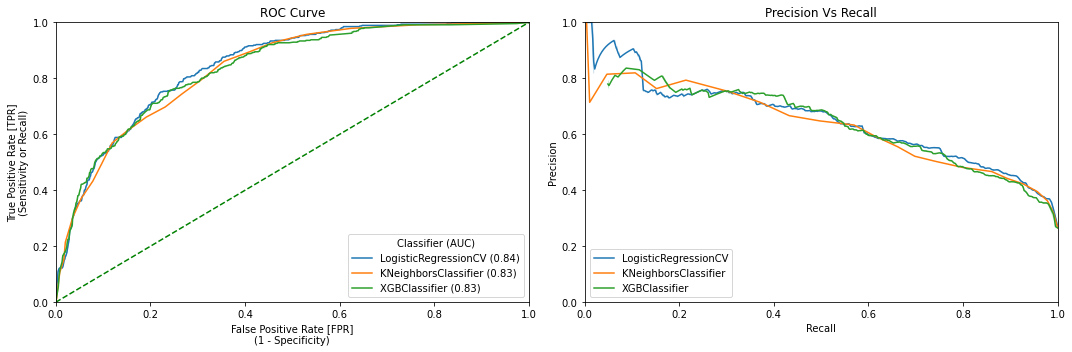

In [195]:
compare_plot

# 8.3. Custom Metrics: Future Work!

We can compare monthly and total-Revenue equivalent to that generated by 'True Negative' cases, corresponding to each algorithm's prediction. This will give us the potential Revenue estimate which can be saved by potentially preventing predicted customer churns.

- % Revenue_Saved (%RS) = this reflects potential Revenue that can be saved per month or per customer life cycle, using different algorithms.
-   Revenue_Saved_Per_Customer (RS/Customer) = this reflects how well different algorithms can select most valued customers.